Fashion MNIST datasets train Deep Neural Network and report the performance. 

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = keras.datasets.fashion_mnist.load_data()

In [27]:
(x_train, y_train), (x_test, y_test) = data
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


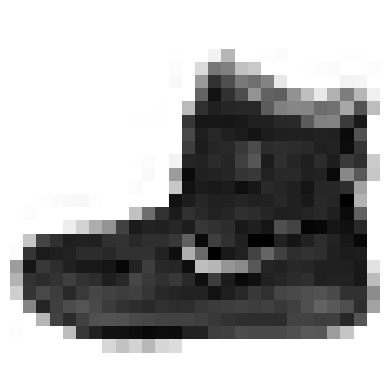

9


In [28]:
some_img = x_train[0]

plt.imshow(some_img, cmap="binary")
plt.axis("off")
plt.show()
print(y_train[0])

In [29]:
# Preprocess and normalize
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

In [33]:
# Convert labels

y_train_encoded = keras.utils.to_categorical(y_train, 10)
y_test_encoded = keras.utils.to_categorical(y_test, 10)

In [36]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(units=300, activation="relu"),
    keras.layers.Dropout(0.33),
    keras.layers.Dense(units=150, activation="relu"),
    keras.layers.Dropout(0.33),
    keras.layers.Dense(units=50, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])
model.compile(
    loss="categorical_crossentropy",  # Correct loss function
    optimizer="adam",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,710 (1.10 MB)

 Trainable params: 288,710 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(x_train, y_train_encoded, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6828 - loss: 0.8645 - val_accuracy: 0.8452 - val_loss: 0.4207
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8338 - loss: 0.4588 - val_accuracy: 0.8533 - val_loss: 0.4010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8477 - loss: 0.4178 - val_accuracy: 0.8602 - val_loss: 0.3743
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8573 - loss: 0.3899 - val_accuracy: 0.8690 - val_loss: 0.3568
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8632 - loss: 0.3715 - val_accuracy: 0.8648 - val_loss: 0.3622
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8659 - loss: 0.3669 - val_accuracy: 0.8784 - val_loss: 0.3310
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8716 - loss: 0.3531 - val_accuracy: 0.8782 - val_loss: 0.3411
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8756 - loss: 0.3363 - val_accuracy: 0.

In [40]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [41]:
# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.88


In [46]:
# Performance Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]))

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.78      0.79      0.79      1000
       Dress       0.88      0.88      0.88      1000
        Coat       0.77      0.83      0.79      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.72      0.66      0.69      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.99      0.96      0.97      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



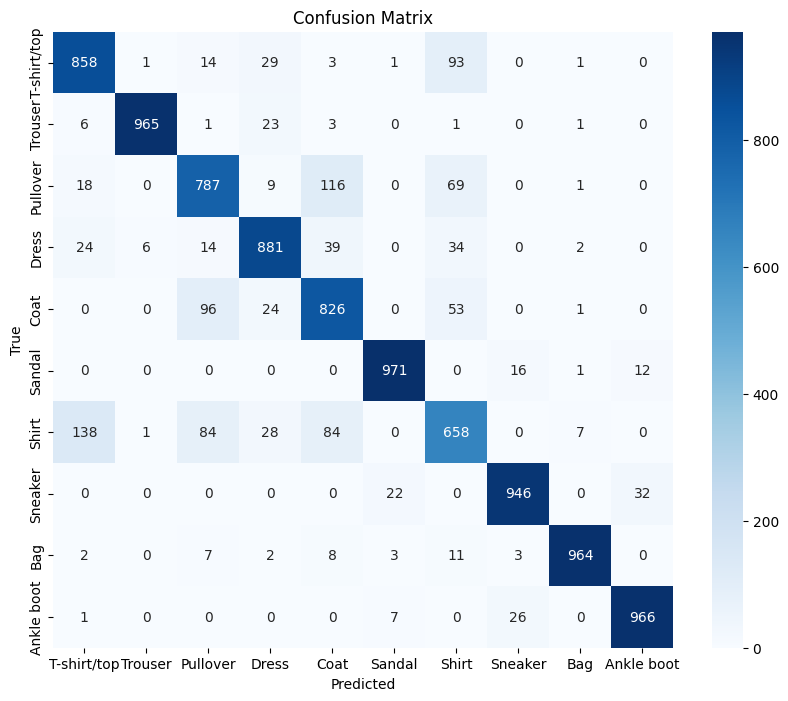

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
], yticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

